In [6]:
import pandas as pd

In [7]:
# Read the data from 'to_analyze34.csv'
df34 = pd.read_csv('to_analyze34.csv')

# Keep only the specified features
df34_clean = df34.loc[:, ['speechiness', 'danceability', 'acousticness', 'valence', 'energy', 'label']]


In [8]:
df34_clean

,speechiness,danceability,acousticness,valence,energy,label
0,0.0544,0.731,0.4010,0.1450,0.5730,1
1,0.0369,0.700,0.2210,0.7560,0.7220,1
2,0.0993,0.746,0.0112,0.7370,0.7650,1
3,0.3750,0.935,0.0194,0.3570,0.4540,1
4,0.0878,0.737,0.4680,0.6820,0.8020,1
...,...,...,...,...,...,...
170648,0.0350,0.224,0.9920,0.0696,0.0082,0
170649,0.9120,0.700,0.1530,0.4910,0.1760,0
170650,0.1200,0.517,0.9770,0.4440,0.2540,0
170651,0.9130,0.699,0.1610,0.6120,0.2380,0


In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into features (X) and target variable (y)
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Predict the labels for the training set
y_train_pred = knn.predict(X_train)

# Predict the labels for the test set
y_test_pred = knn.predict(X_test)

# Calculate the accuracy of the model for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy of the model for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(y_test, y_test_pred)
print("Precision: ", precision)
recall = recall_score(y_test, y_test_pred)
print("Recall: ", recall)
f1 = f1_score(y_test, y_test_pred)
print("F1: ", f1)

# Calculate the overall accuracy of the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Model Accuracy:", accuracy)


Training Accuracy: 0.8100086432955861
Test Accuracy: 0.7296299551727169
Precision:  0.7236347052787595
Recall:  0.7434696029050017
F1:  0.7334180725675988
Model Accuracy: 0.7296299551727169


In [10]:
#tuned Knn
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Create a KNN classifier
knn_tuned = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(knn_tuned, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)

# Fit the model to the training data
best_knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = best_knn.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy_tuned = accuracy_score(y_test, y_pred)
precision_tuned = precision_score(y_test, y_pred)
recall_tuned = recall_score(y_test, y_pred)
f1_tuned = f1_score(y_test, y_pred)

# Print the results for the tuned model
print("Tuned KNN Model:")
print("Accuracy:", accuracy_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1 Score:", f1_tuned)

Tuned KNN Model:
Accuracy: 0.7392106882306407
Precision: 0.7330747732846632
Recall: 0.7527820077310531
F1 Score: 0.7427976998873062


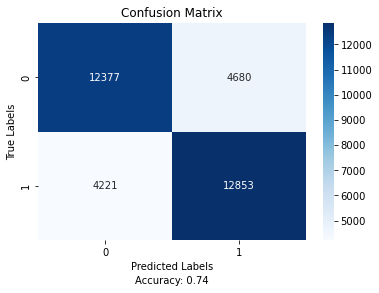

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = best_knn.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Add labels, title, and axis ticks
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

accuracy = accuracy_score(y_test, y_pred)
plt.text(0.5, -0.2, f"Accuracy: {accuracy:.2f}", ha='center', transform=plt.gca().transAxes)

# Show the plot
plt.show()



Training Accuracy: 0.750955889893204
Test Accuracy: 0.7517506079517154
Model Accuracy: 0.751114835367676
Precision: 0.7575303910413798
Recall: 0.7408925852172894
F1 Score: 0.7491191188227282


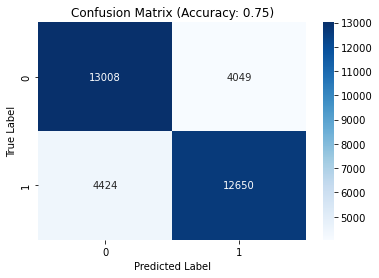

In [27]:
#LogisticRegression 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Fit the Logistic Regression model to the training data
logreg.fit(X_train, y_train)

# Predict the labels for the training set
y_train_pred = logreg.predict(X_train)

# Predict the labels for the test set
y_test_pred = logreg.predict(X_test)

# Calculate the accuracy of the model for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy of the model for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Calculate the overall accuracy of the model
overall_accuracy = accuracy_score(y, logreg.predict(X))
print("Model Accuracy:", overall_accuracy)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Accuracy: {:.2f})".format(test_accuracy))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


c:\Users\elits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\elits\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Tuned Logistic Regression Model:
Accuracy: 0.7516334124403036
Precision: 0.7572565683164761
Recall: 0.7410682909687244
F1 Score: 0.7490749785395021


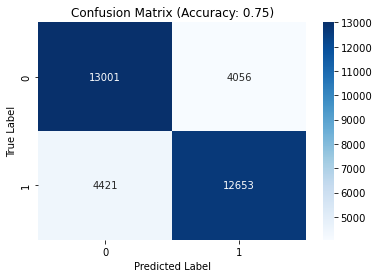

In [28]:
#tuned LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg = LogisticRegression()

# Define the parameter grid
param_grid = {'C': [0.1, 1.0, 10.0],
              'penalty': ['l1', 'l2']}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Logistic Regression classifier with the best hyperparameters
best_logreg = LogisticRegression(**best_params)

# Fit the model to the training data
best_logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = best_logreg.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Tuned Logistic Regression Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Accuracy: {:.2f})".format(accuracy))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [14]:
#decision tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.683689314699247
Precision: 0.6869342544068604
Recall: 0.675588614267307
F1 Score: 0.6812141971298646


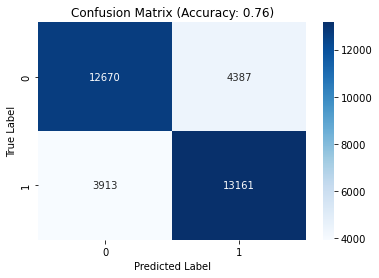

Accuracy: 0.7568193138202807
Precision: 0.75
Recall: 0.7708211315450393
F1 Score: 0.760268037663913


In [24]:
#random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Accuracy: {:.2f})".format(accuracy))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [18]:
#tuned randomforest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  # Set the number of components to retain
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto']
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Fit the classifier to the training data
best_rf_classifier.fit(X_train_pca, y_train)

# Predict the labels for the test set
y_pred = best_rf_classifier.predict(X_test_pca)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




Accuracy: 0.701239342533181
Precision: 0.6959370904325033
Recall: 0.7152981140916013
F1 Score: 0.705484793345464


In [16]:
!pip install xgboost

In [17]:
# gradient boosting model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7622103073452287
Precision: 0.7529079616036137
Recall: 0.7809534965444536
F1 Score: 0.7666743330266789


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define the further reduced hyperparameter grid
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [3]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Gradient Boosting classifier with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(**best_params)

# Fit the classifier to the training data
best_gb_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = best_gb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7358413172775483
Precision: 0.7228429203539823
Recall: 0.765432821834368
F1 Score: 0.7435284747112704


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# Separate the features and the target variable
X = df34_clean.drop('label', axis=1)
y = df34_clean['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce the training dataset size
X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_small)
X_test_pca = pca.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train_pca, y_train_small)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test_pca)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7592804195599309
Precision: 0.7459189339255969
Recall: 0.7868103549256179
F1 Score: 0.7658191768327444


In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA

# Reduce the dataset size
df34_small = df34_clean.sample(frac=0.5, random_state=42)

# Separate the features and the target variable
X = df34_small.drop('label', axis=1)
y = df34_small['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the hyperparameter grid with a single combination
param_grid = {
    'C': [1],
    'gamma': ['scale'],
    'kernel': ['rbf']
}

# Create an SVM classifier
svm_classifier = SVC(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(svm_classifier, param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new SVM classifier with the best hyperparameters
best_svm_classifier = SVC(**best_params)

# Fit the classifier to the training data
best_svm_classifier.fit(X_train_pca, y_train)

# Predict the labels for the test set
y_pred = best_svm_classifier.predict(X_test_pca)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7329778506972928
Precision: 0.7233971874653969
Recall: 0.7603584729981379
F1 Score: 0.7414174658117233
